In [9]:
%matplotlib inline
plt.rcParams['figure.figsize'] = [12, 8]

import numpy as np
import pandas as pd
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

### Basic descriptive statistics
* http://hamelg.blogspot.com/2015/11/python-for-data-analysis-part-24.html
* https://docs.scipy.org/doc/scipy/reference/tutorial/stats.html#t-test-and-ks-test

In [10]:
sample = np.array([1, 3, 4, 4, 6])
print('Mean:', sample.mean())
print('Median:', np.median(sample))
print('Mode:', stats.mode(sample))
print('Sample std:', sample.std(ddof=1))
print('Population std:', sample.std())

Mean: 3.6
Median: 4.0
Mode: ModeResult(mode=array([4]), count=array([2]))
Sample std: 1.81659021246
Population std: 1.62480768093


In [11]:
pd.Series(sample).describe()

count    5.00000
mean     3.60000
std      1.81659
min      1.00000
25%      3.00000
50%      4.00000
75%      4.00000
max      6.00000
dtype: float64

## Distributions

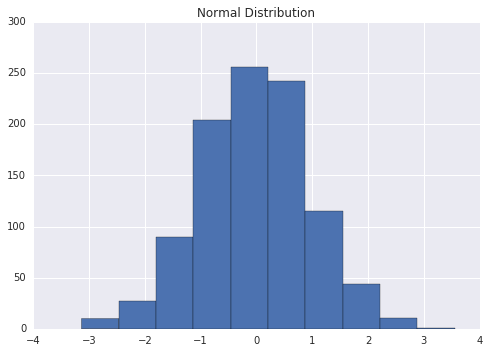

In [12]:
plt.hist(stats.norm.rvs(size=1000))
plt.title('Normal Distribution')

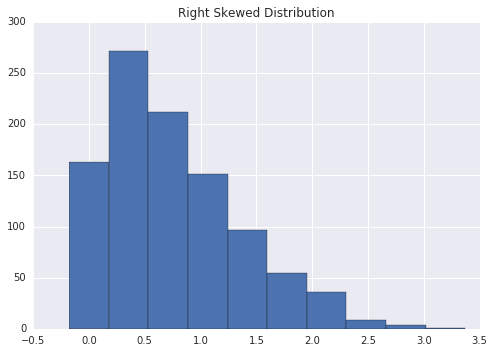

In [13]:
plt.hist(stats.skewnorm.rvs(10, size=1000))
plt.title('Right Skewed Distribution')

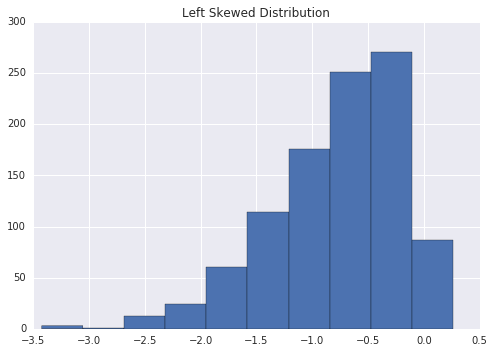

In [14]:
plt.hist(stats.skewnorm.rvs(-10, size=1000))
plt.title('Left Skewed Distribution')

# p-value
The p-value is the probability of obtaining a result equal to or "more extreme" than what was actually observed, when the null hypothesis is true.

# Normal standard distribution
A normal distribution where mean = 0 and std = 1

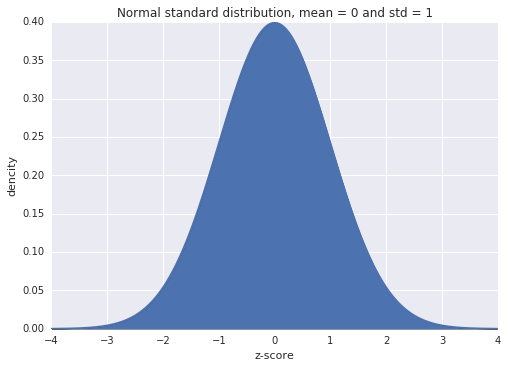

In [15]:
x = np.arange(start=-4, stop=4, step=.01)
y = stats.norm.pdf(x)

plt.plot(x, y)
plt.ylabel('dencity')
plt.xlabel('z-score')
plt.title('Normal standard distribution, mean = 0 and std = 1')
plt.fill_between(x, y)

Z-score shows is can show what is the probability of a point from the distribution to be within.

z-score 1.64485362695


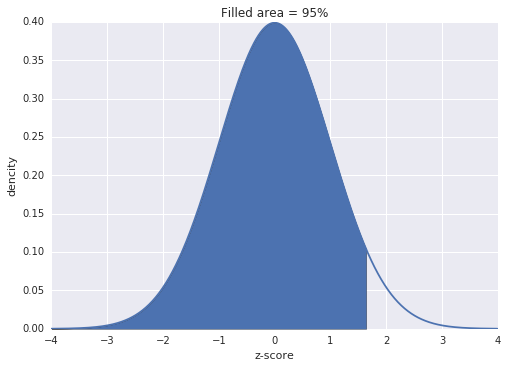

In [16]:
# z-score from probability
zscore = stats.norm.ppf(.95)
print('z-score', zscore)

plt.plot(x, y)
plt.ylabel('dencity')
plt.xlabel('z-score')
plt.title('Filled area = 95%')
fill_condition = x < zscore
plt.fill_between(x[fill_condition], y[fill_condition])

z-score 1.95996398454


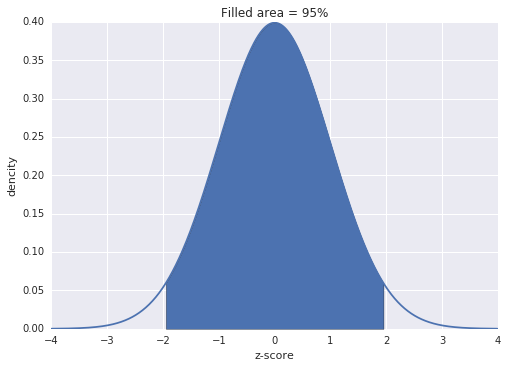

In [17]:
# z-score from probability
zscore = stats.norm.ppf(.975)
print('z-score', zscore)

plt.plot(x, y)
plt.ylabel('dencity')
plt.xlabel('z-score')
plt.title('Filled area = 95%')
fill_condition = (x < zscore) & (x > -zscore)
plt.fill_between(x[fill_condition], y[fill_condition])

In [18]:
print('probability to z-score', stats.norm.ppf(.90))
print('z-score to probability', stats.norm.cdf(1.28))

probability to z-score 1.28155156554
z-score to probability 0.899727432046


### To convert any standard distribution into normal:
(in order to use the z-table)

$z = \frac{x-μ}{σ}$

### Inverse:

$x = μ + zσ$

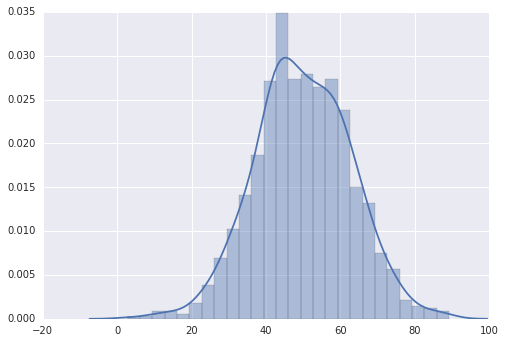

In [19]:
# example
# a standard dis with mean = 50, std = 13 n = 1000
my_dis = np.random.normal(loc=50, scale=13, size=1000)
sns.distplot(my_dis)

In [20]:
# get the lower 20%
zscore = stats.norm.ppf(.2)
zscore = 50 + zscore * 13
lower20pct = my_dis[my_dis < zscore]
print('Lowest 20% are', len(lower20pct), 'in the interval', (lower20pct.min(), lower20pct.max()))

# get the top 10%
zscore = stats.norm.ppf(.90)
zscore = 50 + zscore * 13
top10pct = my_dis[my_dis > zscore]
print('Top 10% are', len(top10pct), 'in the interval', (top10pct.min(), top10pct.max()))

# stats.norm.ppf has optional arguments for to set the dis params and it inverses back
zscore = stats.norm.ppf(.90, loc=50, scale=13)
top10pct = my_dis[my_dis > zscore]
print('Top 10% are', len(top10pct), 'in the interval', (top10pct.min(), top10pct.max()))

Lowest 20% are 188 in the interval (2.8097831151824622, 38.973093250617396)
Top 10% are 92 in the interval (66.695488061263703, 89.274064957157989)
Top 10% are 92 in the interval (66.695488061263703, 89.274064957157989)


### 5. Central Limit Theorem
(means of samples)
- are in normal distribution, the population could have any distribution
- general rule - n of 30 would create normal distribution for sure, could be less
- have the same mean as original distribution
- standard diviation (standard error of the mean) gets smaller with more samples - n

$μ_\bar{x} = μ_x$

$σ_\bar{x} = \frac{σ_x}{\sqrt{n}} $

## $z = \frac{\bar{x}-μ}{σ_\bar{x}}=\frac{\bar{x}-μ}{\frac{σ_x}{\sqrt{n}}}$


In [21]:
# Example:
# Verbal SAT scores

μ = 509
σ = 112

# Chanse to draw one with socre > 590
P = 1 - stats.norm.cdf(590, loc=μ, scale=σ)
print('Probability to draw one with socre > 590 is ', P)

# Chanse to draw 16 with mean socre > 590
n = 16
σ_16 = σ / np.sqrt(n)
P = 1 - stats.norm.cdf(590, loc=μ, scale=σ_16)
print('Probability to draw 16 with mean socre > 590 is ', P)

Probability to draw one with socre > 590 is  0.234774121707
Probability to draw 16 with mean socre > 590 is  0.00190877444424


### Confidence Intervals for Means with known population σ_x:

- margin of error - E
- for known population σ_x:

95% confidence = ⍺ of 0.05 and $\frac{⍺}{2}$ = 0.025


## $E = z_\frac{⍺}{2} \frac{σ_x}{\sqrt{n}} $


In [22]:
# Example with known std of population

ages = [25, 19, 37, 29, 40, 28, 31]
n = len(ages)
σ = 7.081
x = np.mean(ages) # 29.857142857142858

# what is the true population mean with 95 confidence Interval?
alpha = .05
zscore = stats.norm.ppf(alpha / 2) * -1
E = zscore * σ / np.sqrt(n)

inerval = (x - E, x + E)
print('With 95 confidence, the true mean is in interval:', inerval)

With 95 confidence, the true mean is in interval: (24.611561038289395, 35.102724675996321)


### Confidence Intervals for Means with unknown population σ_x:

- for unknown population σ_x we take sample std $σ_\bar{x}$ and use [t-table](https://s3-us-west-2.amazonaws.com/smu-mds/prod/Bridge+to+Statistics/T+Table/t-table.pdf) to estimate the population std. The interval is now wider.

## $E = t_\frac{⍺}{2} \frac{s}{\sqrt{n}} $

example: t of ⍺ = .005 for 7 samples ( row 6 ) = 3.707

[SAS screenflow](https://2ds.datascience.smu.edu/mod/page/view.php?id=4247#/cardContent)

In [23]:
# what is the true population mean with 95 confidence Interval when we don't know sigma?
s = np.std(ages, ddof=1)
s = 7.08
df = n -1
t = stats.t.ppf(.025, df) * -1
E = t * s / np.sqrt(n)

inerval = (x - E, x + E)
print('with unknow σ, population mean with 95 confidence is in Interval:', inerval)

with unknow σ, population mean with 95 confidence is in Interval: (23.309234965348502, 36.405050748937214)


Confidence interval for a <b>single draw</b> from a normal distribution with mean mu and std deviation sigma

In [3]:
mu = 10
sigma = 2
stats.norm.interval(0.95, loc=mu, scale=sigma)

(6.0800720309198919, 13.919927969080108)

Confidence interval for a <b>mean of N draws</b> from a normal distribution with mean mu and std deviation sigma

In [4]:
mu = 10
sigma = 2
N = 20
stats.norm.interval(0.95, loc=mu, scale=sigma/np.sqrt(N))

(9.1234774594234178, 10.876522540576582)

In [ ]:
sigma = minnesota_ages.std() / math.sqrt(50)  # Sample stdev/sample size

stats.t.interval(0.95,                        # Confidence level
                 df = 49,                     # Degrees of freedom
                 loc = minnesota_ages.mean(), # Sample mean
                 scale= sigma)                # Standard dev estimate


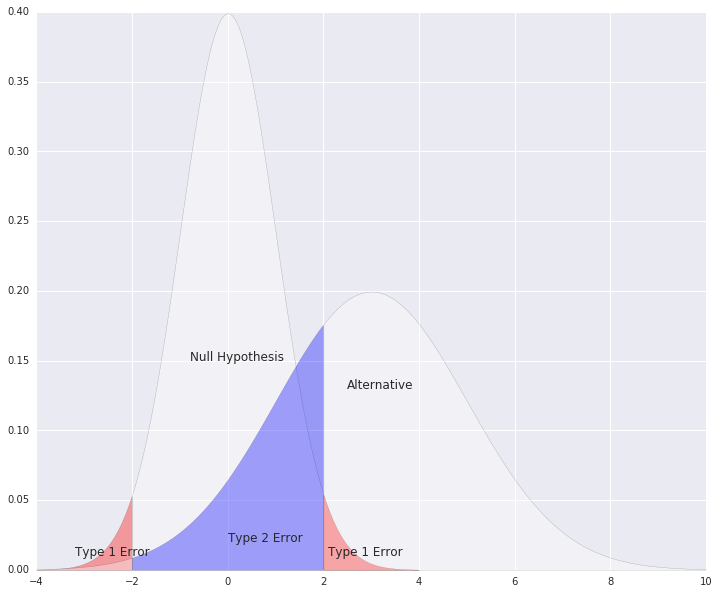

In [5]:
plt.figure(figsize=(12,10))

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01)) ,
                 facecolor='red',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01)) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,4,0.01), 
                 y1= stats.norm.pdf(np.arange(2,4,0.01)) ,
                 facecolor='red',
                 alpha=0.5)

plt.fill_between(x=np.arange(-4,-2,0.01), 
                 y1= stats.norm.pdf(np.arange(-4,-2,0.01),loc=3, scale=2) ,
                 facecolor='white',
                 alpha=0.35)

plt.fill_between(x=np.arange(-2,2,0.01), 
                 y1= stats.norm.pdf(np.arange(-2,2,0.01),loc=3, scale=2) ,
                 facecolor='blue',
                 alpha=0.35)

plt.fill_between(x=np.arange(2,10,0.01), 
                 y1= stats.norm.pdf(np.arange(2,10,0.01),loc=3, scale=2),
                 facecolor='white',
                 alpha=0.35)

plt.text(x=-0.8, y=0.15, s= "Null Hypothesis")
plt.text(x=2.5, y=0.13, s= "Alternative")
plt.text(x=2.1, y=0.01, s= "Type 1 Error")
plt.text(x=-3.2, y=0.01, s= "Type 1 Error")
plt.text(x=0, y=0.02, s= "Type 2 Error")

## Correlation

In [33]:
a = np.random.rand(50)
b = np.random.rand(50)
corr, pvalue = stats.pearsonr(a, b)
print('Pearson\'s correlation coefficient:', corr, '2-tailed p-value', pvalue)

Pearson's correlation coefficient: -0.024495148786 2-tailed p-value 0.968814927076
